In [1]:
import gd
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y = 2*y-3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lambda_value = 0.01
M = np.max(np.linalg.norm(X_train, axis=1)) 
L = M**2 / 4 + lambda_value


[0.3759670792135931, 0.3759670792135931]
[0.023945502793901854, 0.3725855963572462]
[0.01719380749305155, 0.37004236808525504]
[0.015184791330338671, 0.3684485121841451]
[0.01288777158589612, 0.36758359175112565]
[0.010622045907232628, 0.3672119536804622]
[0.008587051513122971, 0.3671398675550403]
[0.006870517118334133, 0.36723141917183577]
[0.005483114828749526, 0.36740129229446045]
[0.0043933330680531535, 0.3676004580399572]
[0.0035524986204684018, 0.36780298656311733]
[0.0029095520240196983, 0.3679964685897903]
[0.002418426056119127, 0.36817588047420857]
[0.002040921293014372, 0.36833996171413613]
[0.001747108638604835, 0.36848920394583]
[0.0015144976957605794, 0.3686247954897152]
[0.0013267025988310047, 0.3687481015491107]
[0.0011720342040192706, 0.3688604307210527]
[0.0010422487604590182, 0.368962947190748]
[0.0009315450473921907, 0.3690566525043173]
[0.0008358151925747036, 0.3691423973391172]
[0.0007521115073710331, 0.36922090362870147]
[0.000678279138721156, 0.369292787929986]
[

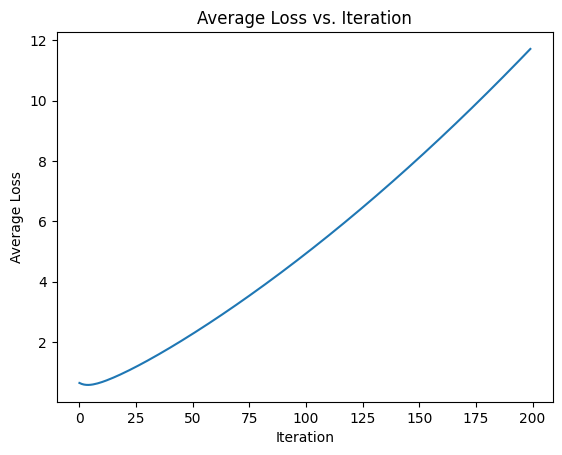

In [2]:

def loss(w, X, y, lambda_value):
    yXw = y * (X @ w)
    log_loss = np.mean(np.log(1 + np.exp(-yXw)))
    reg_loss = (lambda_value / 2) * np.dot(w, w)
    return log_loss + reg_loss

def loss_grad(w, X, y, lambda_value):
    yXw = y * (X @ w)
    log_grad = np.mean((-y * X.T)/(1+np.exp(+yXw)), axis=1)
    reg_grad = lambda_value * w
    return log_grad + reg_grad

f = gd.Func(
    func=loss,
    grad=loss_grad
)

def batch_generator(X, y, batch_size):
    n_samples = X.shape[0]
    for i in range(0, n_samples, batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

workers = []
batch_size = 500
for X_batch, y_batch in batch_generator(X_train, y_train, batch_size):
    worker_func = gd.create_worker_func(f, X_batch, y_batch, lambda_value)
    workers.append(gd.Worker(worker_func))

def top_k(k, arr):
    new_arr = arr.copy()
    new_arr[arr < np.sort(arr)[-k]] = 0
    return new_arr

for worker in workers:
    worker.compress_op = lambda arr: top_k(45, arr)
    pass


dgd = gd.DistributedGD(workers, 2/(L+lambda_value))
w0 = np.zeros(d)  # Начальная инициализация весов
dgd.run_ef21(200, w0)  # Запускаем 100 итераций

# Строим график средней функции потерь
plt.plot([loss(w, X_train, y_train, lambda_value) for w in dgd.history])
print(len(dgd.history))
plt.xlabel('Iteration')
plt.ylabel('Average Loss')
plt.title('Average Loss vs. Iteration')
plt.show()

In [7]:
A = np.array([[1,2], [3,4], [6,5]])
y = np.array([1, 1, -1])
A = A[:1]
y = y[:1]
np.mean([[1,2], [1,2], [1,5]], axis=0)

def top_k(k, arr):
    arr[arr < np.sort(arr)[-k]] = 0

arr = np.array([1, 2, 2, 2, 2, 2])
top_k(2, arr)
arr

array([0, 2, 2, 2, 2, 2])